Customer Purchase Data Analysis

In [ ]:
import pandas as pd
import numpy as np

In [30]:
Customer = pd.read_csv('customer.csv')
print(Customer)

     CustomerID       CustomerName  \
0           501         Ryan Wiley   
1           502    Crystal Roberts   
2           503  Christopher Roach   
3           504    Douglas Winters   
4           505   Christina Vargas   
..          ...                ...   
995        1496   Benjamin Randall   
996        1497   Tracy Fitzgerald   
997        1498    Kristi Williams   
998        1499        David Grant   
999        1500      Alyssa Thomas   

                                               Country  
0                                              Senegal  
1    British Indian Ocean Territory (Chagos Archipe...  
2                                                Niger  
3                                Saint Kitts and Nevis  
4                                              Romania  
..                                                 ...  
995                                        Philippines  
996                                      Guinea-Bissau  
997                           

In [31]:
Product = pd.read_csv('product.csv')
print(Product)

     ProductID      ProductName  ProductCategory
0         3001           Heater  Home Appliances
1         3002       Television      Electronics
2         3003       Smartwatch      Electronics
3         3004     Coffee Maker  Home Appliances
4         3005  Electric Kettle  Home Appliances
..         ...              ...              ...
995       3996           Camera      Electronics
996       3997  Washing Machine  Home Appliances
997       3998       Headphones      Electronics
998       3999          Printer      Electronics
999       4000     Refrigerator  Home Appliances

[1000 rows x 3 columns]


In [48]:
Purchase = pd.read_csv('purchase.csv')
print(Purchase)

     TransactionID  CustomerID  ProductID  PurchaseQuantity  PurchasePrice  \
0                1        1227       3047                 5         689.99   
1                2        1123       3038                 4          79.27   
2                3        1404       3005                 3         666.75   
3                4         749       3003                 5         316.19   
4                5        1119       3009                 4         700.24   
..             ...         ...        ...               ...            ...   
995            996        1049       3005                 2         796.67   
996            997         883       3055                 5         271.88   
997            998         864       3034                 5         594.69   
998            999         866       3014                 4         140.89   
999           1000        1424       3002                 5         861.00   

    PurchaseDate  
0     2024-03-01  
1     2024-01-26  
2     

In [33]:
# Calculate total purchases
total_purchases = Purchase['PurchaseQuantity'].sum()
print("Total purchases :", total_purchases)

Total purchases : 3053


In [34]:
# Calculate total revenue
Purchase['total_price'] = Purchase['PurchaseQuantity'] * Purchase['PurchasePrice']
total_revenue = Purchase['total_price'].sum()
print("Total revenue:", total_revenue)

Total revenue: 1485760.55


In [35]:
# average purchase value
average_purchase_value = total_revenue / total_purchases
print("average purchase value :",round(average_purchase_value,2))

average purchase value : 486.66


In [36]:
import matplotlib.pyplot as plt

Top 10 Customer by purchase behavior

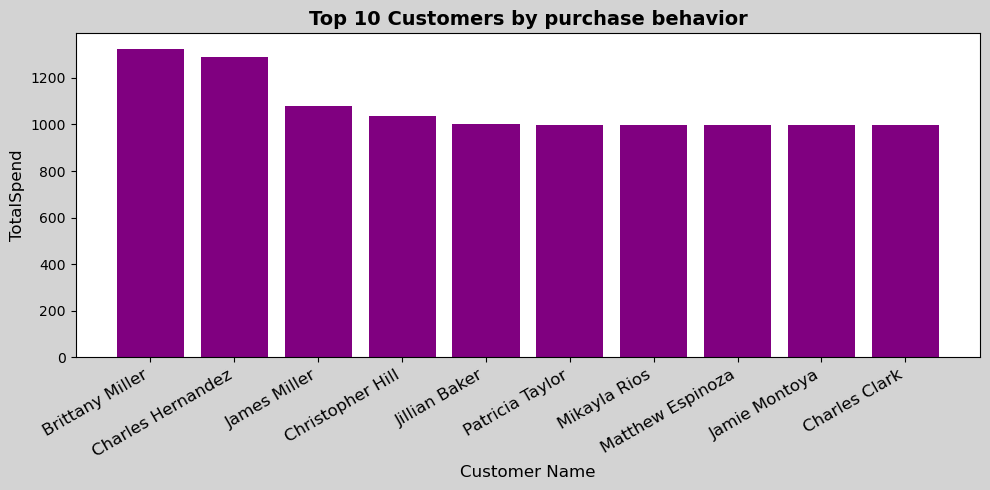

In [37]:
# Identify top customers and their purchasing behavior chart.
merged = pd.merge(Purchase, Customer, on='CustomerID')
top_customers = merged.groupby('CustomerName')['PurchasePrice'].sum().nlargest(10).reset_index()
top_customers.columns = ['CustomerName', 'TotalSpend']
plt.figure(figsize=(10, 5))
plt.gcf().patch.set_facecolor('lightgrey')
plt.gca().set_facecolor('white')
plt.bar(top_customers['CustomerName'], top_customers['TotalSpend'], color='purple')
plt.title('Top 10 Customers by purchase behavior', fontsize=14, fontweight='bold')
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('TotalSpend', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
# Identify top customers and their purchasing behavior.
merged = pd.merge(Purchase, Customer, on='CustomerID')
top_customers = merged.groupby('CustomerName')['PurchasePrice'].sum().nlargest(10).reset_index()
print("Top 10 Customers by Purchase behavior \n:")
print(top_customers.head(10))

Top 10 Customers by Purchase behavior 
:
        CustomerName  PurchasePrice
0    Brittany Miller        1324.45
1  Charles Hernandez        1289.25
2       James Miller        1080.46
3   Christopher Hill        1034.04
4      Jillian Baker         999.98
5    Patricia Taylor         999.44
6       Mikayla Rios         998.17
7   Matthew Espinoza         997.45
8      Jamie Montoya         996.01
9      Charles Clark         995.97


Monthly Purchase Trend

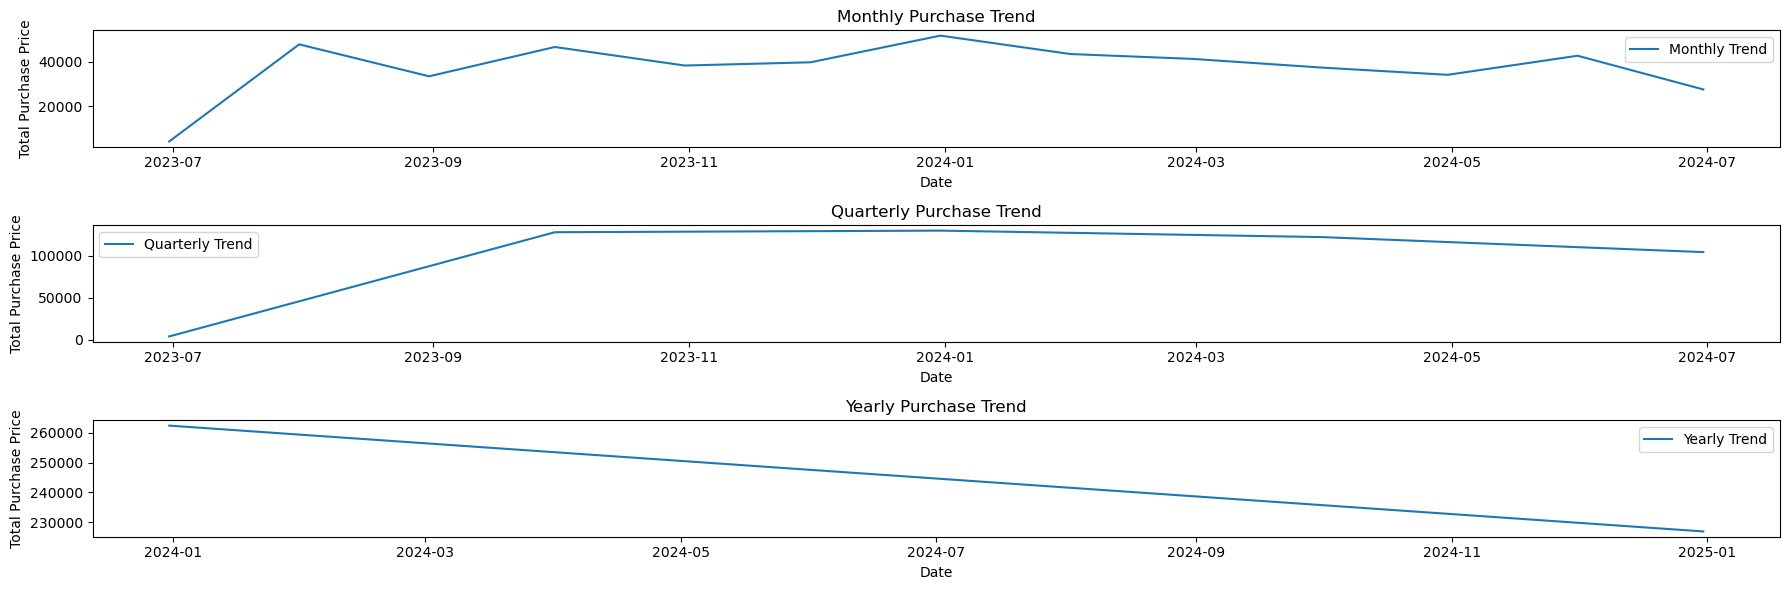

In [39]:
# Analyze purchase trends over time (monthly, quarterly, yearly) chart.
Purchase['PurchaseDate'] = pd.to_datetime(Purchase['PurchaseDate'])
Purchase.set_index('PurchaseDate', inplace=True)
monthly_trend = Purchase.resample('M')['PurchasePrice'].sum()
quarterly_trend = Purchase.resample('Q')['PurchasePrice'].sum()
yearly_trend = Purchase.resample('Y')['PurchasePrice'].sum()

# Plotting the trends
plt.figure(figsize=(18, 6))

# Monthly trend
plt.subplot(3, 1, 1)
plt.plot(monthly_trend, label='Monthly Trend')
plt.title('Monthly Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Total Purchase Price')
plt.legend()

# Quarterly trend
plt.subplot(3, 1, 2)
plt.plot(quarterly_trend, label='Quarterly Trend')
plt.title('Quarterly Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Total Purchase Price')
plt.legend()

# Yearly trend
plt.subplot(3, 1, 3)
plt.plot(yearly_trend, label='Yearly Trend')
plt.title('Yearly Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Total Purchase Price')
plt.legend()

plt.tight_layout()
plt.show()

Top Product Categories by Total Sales

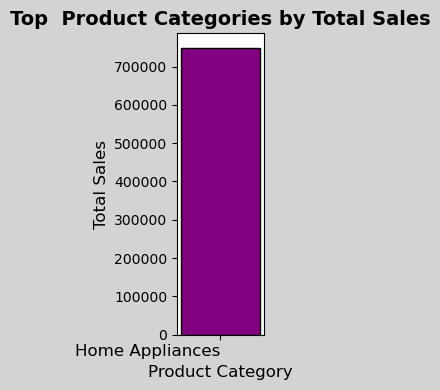

In [40]:
# top product category
merged_data = pd.merge(Purchase, Product, on='ProductID')
merged_data['TotalSales'] = merged_data['PurchaseQuantity'] * merged_data['PurchasePrice']
top_product_categories = merged_data.groupby('ProductCategory')['TotalSales'].sum().nlargest(1).reset_index()
top_product_categories.columns = ['ProductCategory', 'TotalSales']
plt.figure(figsize=(2, 4))  
plt.gcf().patch.set_facecolor('lightgrey')  
plt.gca().set_facecolor('white') 
plt.bar(top_product_categories['ProductCategory'], top_product_categories['TotalSales'], color='purple', edgecolor='black')
plt.title('Top  Product Categories by Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=12)  
plt.tight_layout()
plt.show()

In [46]:
# top product category
merged_data = pd.merge(Purchase, Product, on='ProductID')
merged_data['TotalSales'] = merged_data['PurchaseQuantity'] * merged_data['PurchasePrice']
top_product_categories = merged_data.groupby('ProductCategory')['TotalSales'].sum().nlargest(1).reset_index()
top_product_categories.columns = ['ProductCategory', 'TotalSales']
print(top_product_categories)

   ProductCategory  TotalSales
0  Home Appliances   749315.29


In [49]:
Purchase['PurchaseDate'] = pd.to_datetime(Purchase['PurchaseDate'])
Purchase = Purchase[Purchase['PurchaseDate'].dt.year == 2023]
merged_2023 = pd.merge(Purchase, Customer, on='CustomerID')
unique_customers_2023 = merged_2023.drop_duplicates(subset='CustomerID')
customers_per_country_2023 = unique_customers_2023['Country'].value_counts().reset_index()
customers_per_country_2023.columns = ['Country', 'TotalCustomers']

print(customers_per_country_2023)

           Country  TotalCustomers
0       Luxembourg               7
1           Israel               7
2            Palau               7
3      Saint Lucia               7
4    New Caledonia               6
..             ...             ...
214        Bahrain               1
215           Togo               1
216     Bangladesh               1
217   Saint Helena               1
218         Jersey               1

[219 rows x 2 columns]


In [ ]:

# Generate a summary report with key insights.
summary_report = {
    "Total Purchase": total_purchases,
    "Total reveune": total_revenue,
    "Average of purchase": average_purchase_value,
    "Top Customers by purchase behavior": top_customers,
    "Purchase trends over monthly": monthly,
    "Purchase trends over quarterly": quarterly,
    "Purchase trends over yearly": yearly,
    "Top Product Categories by Total Sales": top_product_categories,
    "Total number of customer from each country in 2023": customers_per_country_2023,
}